# Management and Analysis of Physics Dataset - mod. B

### Davide Maniscalco, Gianmarco Pompeo

***


## Session I

### Preliminary operations 

We need to login to CloudVeneto and access the machine found at the IP address 10.67.22.15. The commands are the following:

`ssh -Y gpompeo@gate.cloudveneto.it`

`ssh root@10.67.22.15`

### PART A

To begin with, we need to access the virtual machine as ROOT. We download REDIS and we unzip the folder

`wget http://download.redis.io/releases/redis-5.0.5.tar.gz`

`gunzip redis-5.0.5.tar.gz ; tar -xvf redis-5.0.5.tar`

It has been decided not to save the download in the `tmp` folder in order to prevent unforeseeable deletions from the system admins. We therefore create a dedicated folder to which we grant `rwx` permissions by running

`chmod -R ugo+rwx redis-5.0.5/`

This step is likely to be unnecessary, but it has been done precautionally.

We then compile the package

`cd redis-5.0.5; make`

and launch the server in background

`./redis-server &`

***

With the command 

`su gpompeo`

I switch back to a regular user and I proceed to set the environment

`export PATH=/redis-5.0.5/src:$PATH `

where we have removed `tmp` from the path for the reason mentioned above. Then, we use the REDIS clients launching 

`redis-cli`


### PART B

We complete the exercise Section 3.1.X found at the link
> https://apeters.web.cern.ch/apeters/csc2018/CloudStorage.html

Below, we will briefly summarize the commands used for each exercise (however, I will not copy all the bodies of the functions in the `cloud.sh` library, as they can be found at the link above). Instead of working with the provided pictures, we create a 1kB file and upload it 100 times giving it different random names

`dd if=/dev/zero of=1kB bs=1kB count=1`

`for((i=0; i<100; i++)); do up_name=`\``uuidgen`\``;
cloud_upload 1kB $up_name;
done`

Here is the summary of the exercises.

* **3.1.1**
 
 We load the library
 
 `load cloud.sh: . cloud.sh;`
 
 then
 
 `sha1string /etc/passwd` 
 
 [OUTPUT] 63ce9c1433c0fad87dcc9d5d22081acc7ff60df4
 
 ***
 
* **3.1.2**

 The function `hd8(x)` converts a hexadecimal character (0,1,2,3,4,5,6,7,8,9,a,b,c,d,e,f) to decimal, it divides by 2 and adds 1.
 
 ***
 
* **3.1.3**

 To assign a variable,
 
 `hash=` \``sha1string/etc/passwd`\`
 
 and to retrieve the variable content we do
 
 `echo $hash`
 
 [OUTPUT] 63ce9c1433c0fad87dcc9d5d22081acc7ff60df4
 
 ***
 
* **3.1.4**

 To select portion of a variable, 
 
 `hashkey=${hash:0:1}`
 
 `echo $hashkey`
 
 [OUTPUT] 6
 
 ***
 
* **3.1.5**

 To get the hashvalue of the previously defined `hashkey`
 
 `h8d $hashkey`
  
 [OUTPUT] 4
 
 ***
 
* **3.1.6**

 To upload a file according to its hashvalue (the functions are provided)
 
 `filename="/etc/resolv.conf"`
 
 `hash=` \``sha1string $filename`\` -- value: 4db35be416b06a118c9e1bd8943bda98a76b59b1
 
 `hashkey=${hash:0:1}` -- value: 4

 `index=`\``h8d $hashkey`\` -- value: 3
 
 `upload $filename $index $filename`
 
 [OUTPUT] OK

 ***

* **3.1.7**

 To instead download the file
 
 `download $index $filename ~/resolv.conf.downloaded`

 ***
 
* **3.1.8**

 To list all files on the server where they have been uploaded
 
 `list $index`

 [OUTPUT] /etc/resolv.conf 

 ***

* **3.1.9**

 To delete a file
 
 `delete $index $filename`
 
 ***
 
* **3.1.10**

 See link above
 
 ***
 
* **3.1.11**

 See link above
 
 ***
 
* **3.1.12**

 To count the number of files in each server

 `for name in 1 2 3 4 5 6 7 8; do list $name | wc -l; done`
 
 [OUTPUT] 11 11 13 17 10 9 11 18
 
 ***

* **3.1.13**

 See link above

 ***

* **3.1.14**

 For the function implementation, see link above. Then, for the time measurements, we do

 `cloud_ls | wc -l`

 [OUTPUT] 100

 `time cloud_ls`

 [OUTPUT] list of all files

         real    0m0.050s
         user    0m0.028s
         sys     0m0.031s
 

### PART C

We want to study the time performance of `cloud_ls` as a function of the number of items it has to go through. We will upload an increasingly higher number of files using the same instruction as above and re-initializing the database every time.

First of all, in order to have a general idea, we make a graphical fit without parameters using a Spline. Since it seemed that data is showing a close-to-linear trend, we also performed two linear fits, one without and one with the 1-million-file point.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
%matplotlib inline

plt.style.use("ggplot")

In [2]:
#without 1 million files
nfile1 = [100, 500, 1000, 5000, 10000, 50000, 1e5]
times1 = [0.050, 0.066, 0.088, 0.131, 0.138, 0.491, 0.961]

#with 1 million files
nfile2 = [100, 500, 1000, 5000, 10000, 50000, 1e5, 1e6]
times2 = [0.050, 0.066, 0.088, 0.131, 0.138, 0.491, 0.961, 8.586]

In [3]:
#Linear fit without the last point
m,q = np.polyfit(nfile1, times1, 1)
print("Fit excluding the 1-million point")
print('m='+str(m)+'  q='+str(q),"\n")

#Linear fit considering all points
b,a = np.polyfit(nfile2, times2, 1)
print("Fit with all points")
print('b='+str(b)+'  a='+str(a))

#non-parametric fit with a spline
spl1 = UnivariateSpline(nfile1,times1)
spl2 = UnivariateSpline(nfile2,times2)

Fit excluding the 1-million point
m=8.889781761838454e-06  q=0.06342319406824468 

Fit with all points
b=8.517491250204312e-06  a=0.07181183843895611


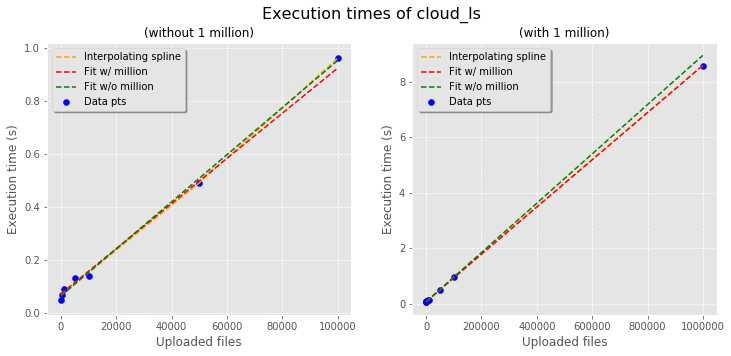

In [4]:
fig, (ax1,ax2)=plt.subplots(nrows=1, ncols=2,figsize=(12,5))

fig.suptitle("Execution times of cloud_ls",fontsize=16)

ax1.set_title("(without 1 million)", fontsize=12)
ax1.set_xlabel('Uploaded files')
ax1.set_ylabel('Execution time (s)')
ax1.scatter(nfile1,times1, color="blue",label="Data pts")
ax1.plot(nfile1,spl1(nfile1), label="Interpolating spline", 
         ls='--', color='orange')
ax1.grid(True,ls="--")

x1 = np.linspace(0, 1e5, 1000)
ax1.plot(x1,b*x1+a,color='r',label='Fit w/ million',ls='--')
ax1.plot(x1,m*x1+q,color='g',label='Fit w/o million',ls='--')
ax1.legend(loc="best",shadow=True)


ax2.set_title("(with 1 million)",fontsize=12)
ax2.set_xlabel('Uploaded files')
ax2.set_ylabel('Execution time (s)')
ax2.scatter(nfile2,times2, color="blue",label="Data pts")
ax2.plot(nfile2,spl2(nfile2), label="Interpolating spline", 
         ls='--', color='orange')
ax2.grid(True,ls="--")

x2 = np.linspace(0, 1e6, 5000)
ax2.plot(x2,b*x2+a,color='r',label='Fit w/ million',ls='--')
ax2.plot(x2,m*x2+q,color='g',label='Fit w/o million',ls='--')
ax2.legend(loc="best",shadow=True)

The execution time of `cloud_ls` appears to grow linearly as the number of uploaded files increases; the difference between the angular coefficients of the two fitting lines is very small (about 4%). The fact that the 1-million-files point lies underneath the expected position might be explained by the fact that with so many files all the system times are completely negligible, while they might have a bigger influence in causing unpredictable deviations in the lower points.

In fact, we can see that for small numbers of files (below 5,000) the values are slightly more randomic and, actually, we noticed a great variability between a trial and another. We suppose this might be due to the intrinsic overheads that are not related to the execution time of the command, perhaps hardware-related.

### PART D

We now upload 1,000,000 files and we measure the time it takes for the upload of every single file (these times will be automatically appended to a file created _ad hoc_).

To get the real time in seconds as output we do

`TIMEFORMAT=%R`

then we run 

`for((i=0; i<1000000; i++)); do up_name=` \``uuidgen`\` `; (time cloud_upload 1kB $up_name) 2>> up_time.csv; done`

The total time it takes for the upload of 1 million files is 12194 seconds.


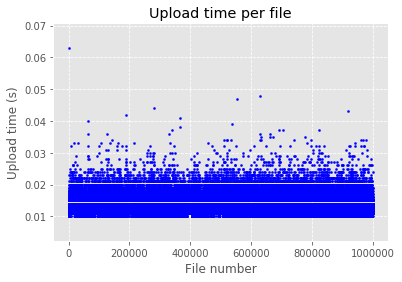

In [5]:
import pandas as pd

million = pd.read_csv("up_time7.csv",header=None)
million.columns = ['time(s)']

tot_time = round(sum(million['time(s)']))
print("The total time it takes for the upload of 1 million files is", tot_time, "seconds.")

ax = million.reset_index().plot.scatter(x='index',y='time(s)',color="blue",s=4)

ax.set_title("Upload time per file")
ax.set_xlabel("File number")
ax.set_ylabel("Upload time (s)")
ax.grid(True,ls="--")

Apart from some random fluctuations which are likely due to unforeseeable side effects, we can clearly see that the upload time is constant throughout the 1-million-file upload, since the distribution stays flat.

### PART E

**Question (1)**

**How do you think the measurements in PART C and PART D would be affected if you use a bucket? You can try it or give a theoretical answer based on what you learned. Both are valid options**


We decided to try this part hands-on. We download `cloudset.sh` and modify `cloud.sh` as described in the section 3.2 of the link in PART B. This updates the library so that a bucket may be used; we hence reset the database and repeat the measurements of PART C and PART D with this new implementation.

In [6]:
#times with and without the one million files
times_bucket1 = [0.013, 0.016, 0.020, 0.031, 0.055, 0.169, 0.380]
times_bucket2 = [0.013, 0.016, 0.020, 0.031, 0.055, 0.169, 0.380, 4.845]

In [7]:
#Linear fit without the last point
m,q = np.polyfit(nfile1, times_bucket1, 1)
print("Fit excluding the 1-million point")
print('m='+str(m)+'  q='+str(q), "\n")

#Linear fit considering all points
b,a = np.polyfit(nfile2, times_bucket2, 1)
print("Fit with all points")
print('b='+str(b)+'  a='+str(a))

#non-parametric fit with a spline
spl1 = UnivariateSpline(nfile1,times_bucket1)
spl2 = UnivariateSpline(nfile2,times_bucket2)

Fit excluding the 1-million point
m=3.5682320422852303e-06  q=0.012790363107897187 

Fit with all points
b=4.849714924857906e-06  a=-0.016084678917404473


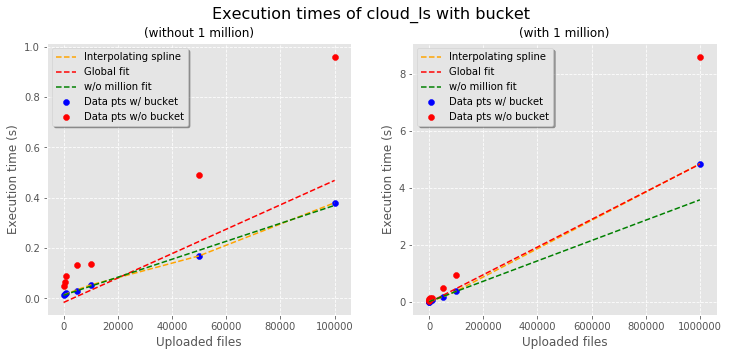

In [8]:
fig, (ax1,ax2)=plt.subplots(nrows=1, ncols=2,figsize=(12,5))

fig.suptitle("Execution times of cloud_ls with bucket",fontsize=16)

ax1.set_title("(without 1 million)", fontsize=12)
ax1.set_xlabel('Uploaded files')
ax1.set_ylabel('Execution time (s)')
ax1.scatter(nfile1,times_bucket1, color="blue",label="Data pts w/ bucket")
ax1.scatter(nfile1,times1, color="red",label="Data pts w/o bucket")
ax1.plot(nfile1,spl1(nfile1), label="Interpolating spline", 
         ls='--', color='orange')
ax1.plot(x1,b*x1+a,color='r',label='Global fit',ls='--')
ax1.plot(x1,m*x1+q,color='g',label='w/o million fit',ls='--')
ax1.grid(True,ls="--")
ax1.legend(loc="best",shadow=True)


ax2.set_title("(with 1 million)",fontsize=12)
ax2.set_xlabel('Uploaded files')
ax2.set_ylabel('Execution time (s)')
ax2.scatter(nfile2,times_bucket2, color="blue",label="Data pts w/ bucket")
ax2.scatter(nfile2,times2, color="red",label="Data pts w/o bucket")
ax2.plot(nfile2,spl2(nfile2), label="Interpolating spline", 
         ls='--', color='orange')
ax2.plot(x2,b*x2+a,color='r',label='Global fit',ls='--')
ax2.plot(x2,m*x2+q,color='g',label='w/o million fit',ls='--')
ax2.grid(True,ls="--")
ax2.legend(loc="best",shadow=True)

As we can see from the plots, execution times of the function `cloud_ls` for the files with a bucket are less than the ones without it. This is exactly what the bucket is meant for: the additional metadata allows to find the location of the file and thanks to this it is not necessary anymore to loop on the 8 pools to list the files.

Also, there seems to be a more regular behavior in the initial points, where the number of files is limited: it is possible that, thanks to the bucket, the system manages to handle listing in a more consistent way, hence limiting, in a way, random time losses.

In this case, though, the 1-million point shows a more significant deviation.

The total time it takes for the upload of 1 million files is 17837 seconds.


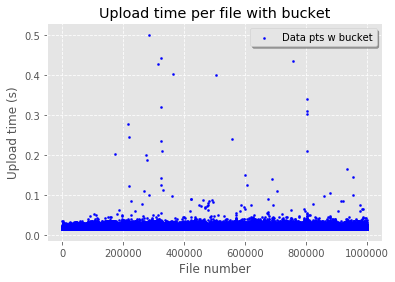

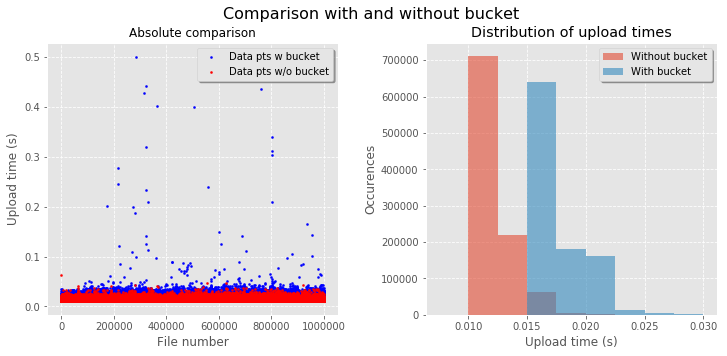

In [9]:
million_bucket = pd.read_csv("up_time_bucket7.csv",header=None)
million_bucket.columns = ['time(s)']

tot_time = round(sum(million_bucket['time(s)']))
print("The total time it takes for the upload of 1 million files is", tot_time, "seconds.")

fig, ax = plt.subplots()
million_bucket.reset_index().plot.scatter(x='index',y='time(s)',color="blue",label="Data pts w bucket", ax=ax,s=4)

ax.set_title("Upload time per file with bucket")
ax.set_xlabel("File number")
ax.set_ylabel("Upload time (s)")
ax.legend(loc="upper right",shadow=True)
ax.grid(True,ls="--")

#################

fig, (ax2,ax3)=plt.subplots(nrows=1, ncols=2,figsize=(12,5))

fig.suptitle("Comparison with and without bucket",fontsize=16)

million_bucket.reset_index().plot.scatter(x='index',y='time(s)',color="blue",label="Data pts w bucket", ax=ax2,s=4)
million.reset_index().plot.scatter(x='index',y='time(s)',color="red",label="Data pts w/o bucket", ax=ax2,s=4)
ax2.set_title("Absolute comparison", fontsize=12)
ax2.set_xlabel('File number')
ax2.set_ylabel('Upload time (s)')
ax2.grid(True,ls="--")
ax2.legend(loc="upper right",shadow=True)


bins = [0.0025*i for i in range(3,13)]
million.hist(column='time(s)',bins=bins, label="Without bucket",alpha=0.6,ax=ax3)
million_bucket.hist(column='time(s)',bins=bins,label="With bucket",alpha=0.6,ax=ax3)
ax3.set_xlabel("Upload time (s)")
ax3.set_ylabel("Occurences")
ax3.set_title("Distribution of upload times")
ax3.grid(True,ls="--")
ax3.legend(loc="upper right",shadow=True)

As we can see from the plot, in both cases (with and without buckets) there is not a significant variation in the upload times for the single file, from the first to the last. We do see some outliers (very few indeed), which could have been caused by hardware effects or other unpredictable irregularities.

On the other hand, from the histograms it is clear that uploading files with bucket is a bit slower: this is simply due to the additional metadata that accompanies the files themselves. The upload of one million files with the bucket took, for example, about one and half hour more than its pair without it.

**Question (2)**

**Imagine you implement security and for each function you call you have an authentication overhead of 1 second. How do you think your measurements will be impacted? Again, you can try this directly (you can use the unix “sleep 1” command) or give a theoretical answer based on what you learned. What would you do to limit the impact of security overhead if you were the developer of REDIS?**

The implementation of an authentication overhead of 1 second per operation for security purposes would have a dramatic impact on the time measurements performed previously. For example, when uploading files, the upload time was in the range of tens of milliseconds, which makes the time wasted in authentication way dominant; this would mean that when dealing with 100,000 o 1 million files we would have to wait even more than a day and just for the security implementations!

In our scenario, where we are working with a huge number of limited files, this authentication solution would then be absolutely inefficient. A possible alternative could be to make the authentication process more stringent (say, by means of a GUID) but only requesting it at access time or every some operations (e.g.: every 1,000 or 10,000 operations performed). It is also possible to request authentication at time intervals, forcing a session to ask for credentials for example every 5 or 10 minutes, in order to avoid unlimited access.

Otherwise, accountability could be implemented, so that we would be able to relax our security protocols while making all the users accountable for the actions they have performed, since they will end up in a log.

**Question (3)**

**The storage we deployed using REDIS is very simple, there is no redundancy. How would you modify your service and your client to reduce the probability of data loss?**

In such a simple implementation of a REDIS server, redundancy was not taken into consideration, but in real life this could have huge implications: data loss constitutes a real threat without any strategy to effectively prevent it.

As far as the service is concerned, a way to implement redundancy is through the RAID (Redundant Array of Independent Disks) system. For our simple purposes, even RAID1 would probably be enough: the data is simply copied on two disks (disk mirroring) and if one particular piece of data is lost, then its copy on the other disk will prevent a definitive loss of information. More complex strategies, such as RAID5 or RAID6, also implement error detection and correction algorithms and can withstand the loss of one or two whole disks, respectively. This will also improve the availability of the data itself, so in case of a storage unit failure, information can still be retrieved.

From the client's perspective, instead, a possibility to prevent data loss could be to restrict only to a limited number of qualified users the possibility to delete files or to launch commands that can perform actions that cannot be undone.